# NYC 311 Customer Service Request

###  DESCRIPTION

#### Background of Problem Statement :

NYC 311's mission is to provide the public with quick and easy access to all New York City government services and information while offering the best customer service. Each day, NYC311 receives thousands of requests related to several hundred types of non-emergency services, including noise complaints, plumbing issues, and illegally parked cars. These requests are received by NYC311 and forwarded to the relevant agencies such as the police, buildings, or transportation. The agency responds to the request, addresses it, and then closes it.

### Problem Objective :

Perform a service request data analysis of New York City 311 calls. You will focus on the data wrangling techniques to understand the pattern in the data and also visualize the major complaint types.

### Domain: Customer Service
### Analysis Tasks to be performed:
(Perform a service request data analysis of New York City 311 calls)

### Import a 311 NYC service request.

Read or convert the columns ‘Created Date’ and Closed Date’ to datetime datatype and create a new column ‘Request_Closing_Time’ as the time elapsed between request creation and request closing. (Hint: Explore the package/module datetime)

Provide major insights/patterns that you can offer in a visual format (graphs or tables); at least 4 major conclusions that you can come up with after generic data mining.

Order the complaint types based on the average ‘Request_Closing_Time’, grouping them for different locations. Perform a statistical test for the following:

Please note: For the below statements you need to state the Null and Alternate and then provide a statistical test to accept or reject the Null Hypothesis along with the corresponding ‘p-value’.

Whether the average response time across complaint types is similar or not (overall)

Are the type of complaint or service requested and location related?

## 1.Import Libraries

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import style
%matplotlib inline
import seaborn as sns

## 2.Load Data

In [3]:
csr_df=pd.read_csv("311_Service_Requests_from_2010_to_Present.csv",low_memory=False)

## 3.Basic Data Exploratory Analysis

In [4]:
csr_df.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,12/31/2015 11:59:45 PM,01-01-16 0:55,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,12/31/2015 11:59:44 PM,01-01-16 1:26,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,12/31/2015 11:59:29 PM,01-01-16 4:51,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,12/31/2015 11:57:46 PM,01-01-16 7:43,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,12/31/2015 11:56:58 PM,01-01-16 3:24,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"


In [5]:
csr_df.shape

(300698, 53)

In [6]:
csr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300698 entries, 0 to 300697
Data columns (total 53 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Unique Key                      300698 non-null  int64  
 1   Created Date                    300698 non-null  object 
 2   Closed Date                     298534 non-null  object 
 3   Agency                          300698 non-null  object 
 4   Agency Name                     300698 non-null  object 
 5   Complaint Type                  300698 non-null  object 
 6   Descriptor                      294784 non-null  object 
 7   Location Type                   300567 non-null  object 
 8   Incident Zip                    298083 non-null  float64
 9   Incident Address                256288 non-null  object 
 10  Street Name                     256288 non-null  object 
 11  Cross Street 1                  251419 non-null  object 
 12  Cross Street 2  

## 4.Dropping All Null Columns

In [7]:
csr_df1=csr_df.drop(["Garage Lot Name","Taxi Pick Up Location","Taxi Company Borough","Vehicle Type","School or Citywide Complaint"],axis=1)

In [8]:
csr_df1.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,School Not Found,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,12/31/2015 11:59:45 PM,01-01-16 0:55,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,N,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,12/31/2015 11:59:44 PM,01-01-16 1:26,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,N,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,12/31/2015 11:59:29 PM,01-01-16 4:51,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,N,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,12/31/2015 11:57:46 PM,01-01-16 7:43,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,N,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,12/31/2015 11:56:58 PM,01-01-16 3:24,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,N,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"


## 5.Read or convert the columns ‘Created Date’ and 'Closed Date’ to datetime datatype

In [9]:
import datetime

In [10]:
csr_df1['Created Date']=pd.to_datetime(csr_df1['Created Date'])
csr_df1['Closed Date']=pd.to_datetime(csr_df1['Closed Date'])
csr_df1['Due_Date']=pd.to_datetime(csr_df1['Due Date'])

csr_df1

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location,Due_Date
0,32310363,2015-12-31 23:59:45,2016-01-01 00:55:00,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)",2016-01-01 07:59:00
1,32309934,2015-12-31 23:59:44,2016-01-01 01:26:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)",2016-01-01 07:59:00
2,32309159,2015-12-31 23:59:29,2016-01-01 04:51:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)",2016-01-01 07:59:00
3,32305098,2015-12-31 23:57:46,2016-01-01 07:43:00,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)",2016-01-01 07:57:00
4,32306529,2015-12-31 23:56:58,2016-01-01 03:24:00,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)",2016-01-01 07:56:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300693,30281872,2015-03-29 00:33:41,NaT,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,NaN,CRESCENT AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-03-29 08:33:41
300694,30281230,2015-03-29 00:33:28,2015-03-29 02:33:59,NYPD,New York City Police Department,Blocked Driveway,Partial Access,Street/Sidewalk,11418.0,100-17 87 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.694077,-73.846087,"(40.69407728322387, -73.8460866160573)",2015-03-29 08:33:28
300695,30283424,2015-03-29 00:33:03,2015-03-29 03:40:20,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,11206.0,162 THROOP AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.699590,-73.944234,"(40.69959035300927, -73.94423377144169)",2015-03-29 08:33:03
300696,30280004,2015-03-29 00:33:02,2015-03-29 04:38:35,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,10461.0,3151 EAST TREMONT AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.837708,-73.834587,"(40.8377075854206, -73.83458731019586)",2015-03-29 08:33:02


## 6.Create a new column ‘Request_Closing_Time’ as the time elapsed between request creation and request closing.

In [11]:
csr_df1['Request closing Time'] = csr_df1['Closed Date'] - csr_df1['Created Date']

In [12]:
csr_df1.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location,Due_Date,Request closing Time
0,32310363,2015-12-31 23:59:45,2016-01-01 00:55:00,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)",2016-01-01 07:59:00,0 days 00:55:15
1,32309934,2015-12-31 23:59:44,2016-01-01 01:26:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)",2016-01-01 07:59:00,0 days 01:26:16
2,32309159,2015-12-31 23:59:29,2016-01-01 04:51:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)",2016-01-01 07:59:00,0 days 04:51:31
3,32305098,2015-12-31 23:57:46,2016-01-01 07:43:00,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)",2016-01-01 07:57:00,0 days 07:45:14
4,32306529,2015-12-31 23:56:58,2016-01-01 03:24:00,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)",2016-01-01 07:56:00,0 days 03:27:02


In [13]:
csr_df1.columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Description', 'Resolution Action Updated Date',
       'Community Board', 'Borough', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'Park Facility Name', 'Park Borough',
       'School Name', 'School Number', 'School Region', 'School Code',
       'School Phone Number', 'School Address', 'School City', 'School State',
       'School Zip', 'School Not Found', 'Bridge Highway Name',
       'Bridge Highway Direction', 'Road Ramp', 'Bridge Highway Segment',
       'Ferry Direction', 'Ferry Terminal Name', 'Latitude', 'Longitude',
       'Location', 'Due_Date', 'Request closing Time'],
      d

## 7.Find major complaint type

In [15]:
major_comp=csr_df1.loc[:,['Complaint Type']]

In [16]:
major_comp

,Complaint Type
0,Noise - Street/Sidewalk
1,Blocked Driveway
2,Blocked Driveway
3,Illegal Parking
4,Illegal Parking
...,...
300693,Noise - Commercial
300694,Blocked Driveway
300695,Noise - Commercial
300696,Noise - Commercial


In [51]:
major_comp['Complaint Type'].unique()

array(['Noise - Street/Sidewalk', 'Blocked Driveway', 'Illegal Parking',
       'Derelict Vehicle', 'Noise - Commercial',
       'Noise - House of Worship', 'Posting Advertisement',
       'Noise - Vehicle', 'Animal Abuse', 'Vending', 'Traffic',
       'Drinking', 'Bike/Roller/Skate Chronic', 'Panhandling',
       'Noise - Park', 'Homeless Encampment', 'Urinating in Public',
       'Graffiti', 'Disorderly Youth', 'Illegal Fireworks',
       'Ferry Complaint', 'Agency Issues', 'Squeegee', 'Animal in a Park'],
      dtype=object)

In [17]:
major_comp.nunique()

Complaint Type    24
dtype: int64

## 8.Plot the bar graph of count vs. compaint type

In [18]:
major_comp_count=major_comp.value_counts()

In [20]:
major_comp_count

Complaint Type           
Blocked Driveway             77044
Illegal Parking              75361
Noise - Street/Sidewalk      48612
Noise - Commercial           35577
Derelict Vehicle             17718
Noise - Vehicle              17083
Animal Abuse                  7778
Traffic                       4498
Homeless Encampment           4416
Noise - Park                  4042
Vending                       3802
Drinking                      1280
Noise - House of Worship       931
Posting Advertisement          650
Urinating in Public            592
Bike/Roller/Skate Chronic      427
Panhandling                    307
Disorderly Youth               286
Illegal Fireworks              168
Graffiti                       113
Agency Issues                    6
Squeegee                         4
Ferry Complaint                  2
Animal in a Park                 1
dtype: int64

<AxesSubplot:title={'center':'Count Vs. Complaint Types'}, xlabel='Complaint Type'>

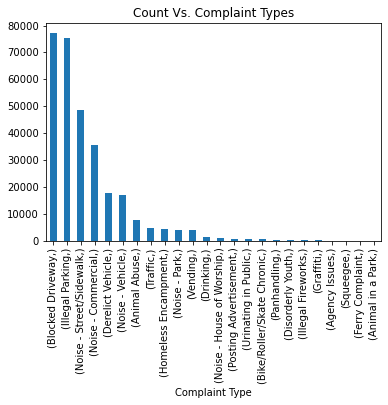

In [19]:
major_comp_count.plot(kind='bar',title='Count Vs. Complaint Types')

### ### Major complaint type are blocked driveway

## 9.Plot the bar graph showing top 10 complaint type

In [21]:
major_comp_count.head(10)

Complaint Type         
Blocked Driveway           77044
Illegal Parking            75361
Noise - Street/Sidewalk    48612
Noise - Commercial         35577
Derelict Vehicle           17718
Noise - Vehicle            17083
Animal Abuse                7778
Traffic                     4498
Homeless Encampment         4416
Noise - Park                4042
dtype: int64

<AxesSubplot:title={'center':'The major complaint types and their count'}, xlabel='Complaint Type'>

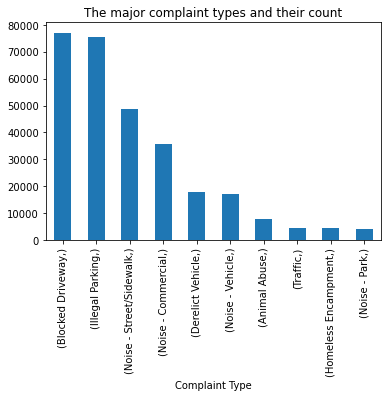

In [22]:
major_comp_count.head(10).plot(kind='bar',title='The major complaint types and their count')

In [52]:
majorcomplints=csr_df1.dropna(subset=["Complaint Type"])
majorcomplints=csr_df1.groupby("Complaint Type")

sortedComplaintType = majorcomplints.size().sort_values(ascending = False)
sortedComplaintType = sortedComplaintType.to_frame('count').reset_index()

sortedComplaintType
sortedComplaintType.head(5)

,Complaint Type,count
0,Blocked Driveway,77044
1,Illegal Parking,75361
2,Noise - Street/Sidewalk,48612
3,Noise - Commercial,35577
4,Derelict Vehicle,17718


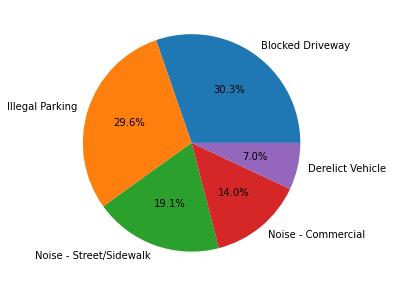

In [39]:
sortedComplaintType = sortedComplaintType.head()
plt.figure(figsize=(5,5))
plt.pie(sortedComplaintType['count'],labels=sortedComplaintType["Complaint Type"], autopct="%1.1f%%")
plt.show()

## 8.Analysing number of compaint types and its city of occurence 

In [23]:
compainttype_city=pd.DataFrame({'count':csr_df1.groupby(['Complaint Type','City']).size()}).reset_index()

In [24]:
compainttype_city

,Complaint Type,City,count
0,Animal Abuse,ARVERNE,38
1,Animal Abuse,ASTORIA,125
2,Animal Abuse,BAYSIDE,37
3,Animal Abuse,BELLEROSE,7
4,Animal Abuse,BREEZY POINT,2
...,...,...,...
759,Vending,STATEN ISLAND,25
760,Vending,SUNNYSIDE,15
761,Vending,WHITESTONE,1
762,Vending,WOODHAVEN,6


In [25]:
csr_df1.groupby(['Borough','Complaint Type','Descriptor']).size()

Borough      Complaint Type         Descriptor               
BRONX        Animal Abuse           Chained                      132
                                    In Car                        36
                                    Neglected                    673
                                    No Shelter                    71
                                    Other (complaint details)    311
                                                                ... 
Unspecified  Noise - Vehicle        Engine Idling                 11
             Posting Advertisement  Vehicle                        1
             Traffic                Truck Route Violation          1
             Vending                In Prohibited Area             2
                                    Unlicensed                     5
Length: 288, dtype: int64

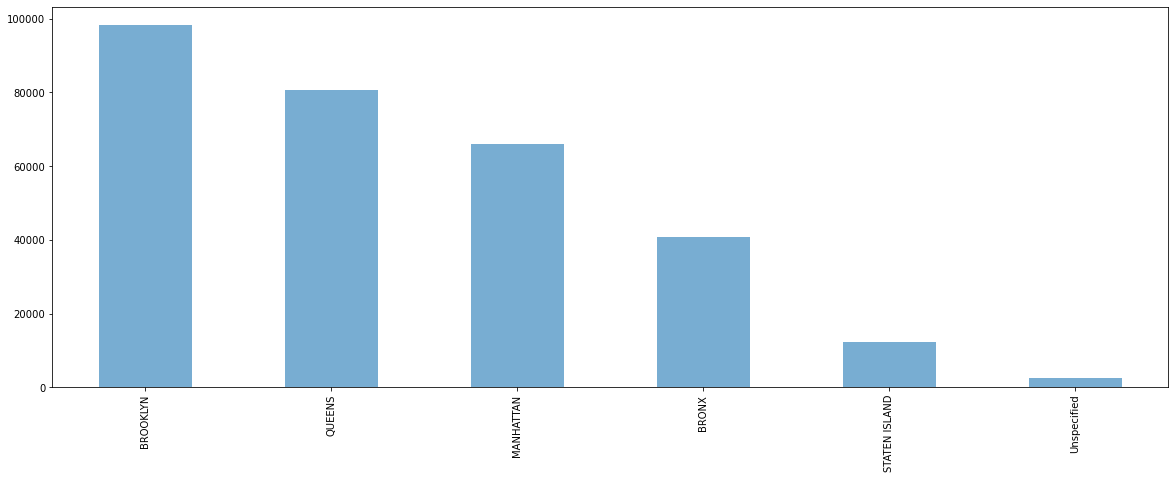

In [48]:
csr_df1['Borough'].value_counts().plot(kind='bar',alpha=0.6,figsize=(20,7))
plt.show()

## 9.Group dataset by complaint type to display plot against city

In [26]:
groupby_complainttype=csr_df1.groupby('Complaint Type')

In [27]:
grp_data=groupby_complainttype.get_group('Blocked Driveway')

In [28]:
grp_data.shape

(77044, 50)

In [29]:
csr_df1['City'].shape

(300698,)

In [30]:
csr_df1.isnull().sum()

Unique Key                             0
Created Date                           0
Closed Date                         2164
Agency                                 0
Agency Name                            0
Complaint Type                         0
Descriptor                          5914
Location Type                        131
Incident Zip                        2615
Incident Address                   44410
Street Name                        44410
Cross Street 1                     49279
Cross Street 2                     49779
Intersection Street 1             256840
Intersection Street 2             257336
Address Type                        2815
City                                2614
Landmark                          300349
Facility Type                       2171
Status                                 0
Due Date                               3
Resolution Description                 0
Resolution Action Updated Date      2187
Community Board                        0
Borough         

In [31]:
# Fix blank balue in city column

In [32]:
csr_df1['City'].dropna(inplace=True)

In [33]:
# Shape after dropping nan value
csr_df1['City'].shape

(300698,)

In [35]:
#count of null values in grouped city column data
grp_data['City'].isnull().sum()

283

In [36]:
#fix those NAN with "unknown city" value instead
grp_data['City'].fillna('Unknown City', inplace =True)

C:\Users\hp\anaconda3\lib\site-packages\pandas\core\series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


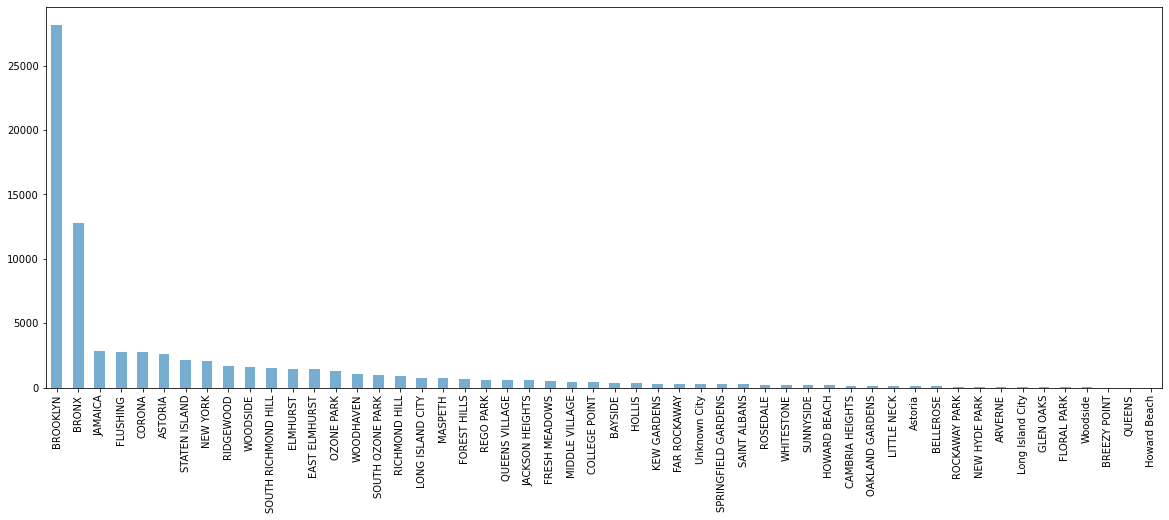

In [50]:
grp_data['City'].value_counts().plot(kind='bar',alpha=0.6,figsize=(20,7))
plt.show()

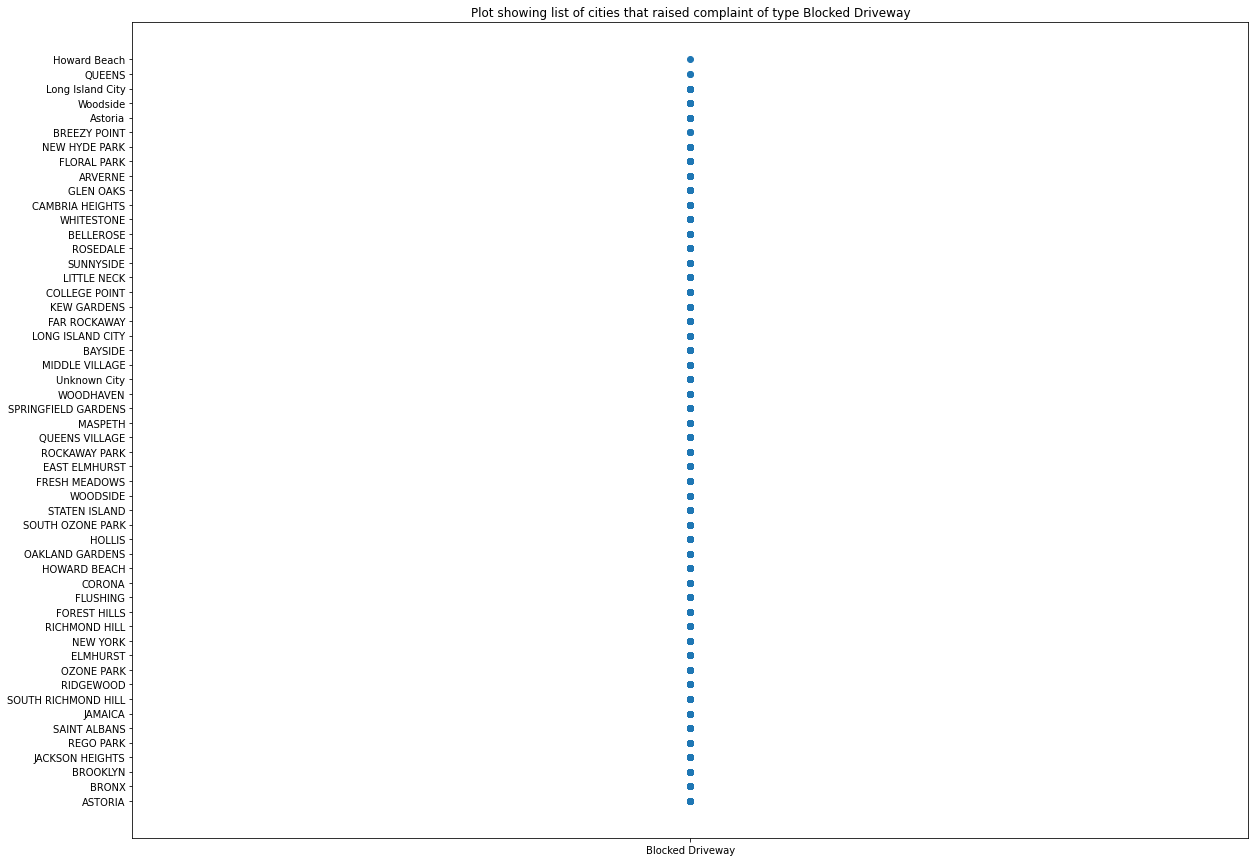

In [37]:
#Scatter plot displaying all the cities that raised complaint of type 'Blocked Driveway'
plt.figure(figsize=(20, 15))
plt.scatter(grp_data['Complaint Type'],grp_data['City'])
plt.title('Plot showing list of cities that raised complaint of type Blocked Driveway')
plt.show()

## 11.Status of ticket

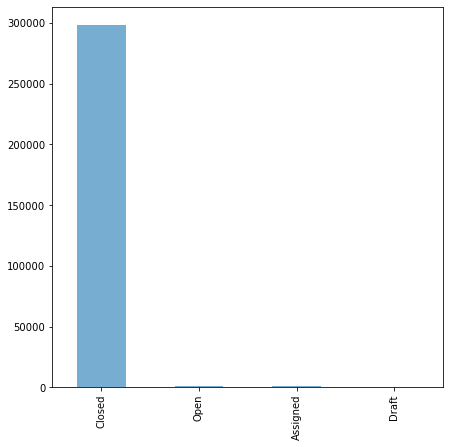

In [43]:
csr_df1['Status'].value_counts().plot(kind='bar',alpha=0.6,figsize=(7,7))
plt.show()